In [1]:
import pandas as pd
import numpy as np

crml = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold20220101_20231231_filled.csv", low_memory = False)
crml01 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202401_filled.csv", low_memory = False)
crml02 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202402_filled.csv", low_memory = False)
crml03 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202403_filled.csv", low_memory = False)
crml04 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202404_filled.csv", low_memory = False)
crml05 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202405_filled.csv", low_memory = False)
crml06 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202406_filled.csv", low_memory = False)
crml07 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202407_filled.csv", low_memory = False)
crml08 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202408.csv", low_memory = False)
crml09 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202409.csv", low_memory = False)
crml10 = pd.read_csv("/Users/isaacchang/Desktop/idxexchange/CRMLSSold202410.csv", low_memory = False)

In [2]:
#focusing only on single-family residences
crml = crml[(crml['PropertyType'] == "Residential") &
            (crml['PropertySubType'] == "SingleFamilyResidence")]

#finding percentage of NaN for each column
nan_percentage = (crml.isna().sum() / len(crml)) * 100
nan_df = pd.DataFrame({
    'Column': nan_percentage.index,
    'NaN_Percentage': nan_percentage.values
})

nan_df

,Column,NaN_Percentage
0,Flooring,35.908677
1,ViewYN,17.905897
2,WaterfrontYN,99.952044
3,BasementYN,97.580188
4,PoolPrivateYN,11.659036
...,...,...
75,AssociationFee,29.807627
76,LotSizeSquareFeet,1.772088
77,MiddleOrJuniorSchoolDistrict,100.000000
78,latfilled,0.000000


In [3]:
#list of columns to drop
columns_to_drop = [
    'ListingKey', 'ListAgentEmail', 'ListAgentFirstName', 'ListAgentLastName', 
    'PropertyType', 'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName', 
    'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName', 
    'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName', 'Latitude',
    'FireplacesTotal', 'AboveGradeFinishedArea', 'ListingKeyNumeric', 'Longitude',
    'TaxAnnualAmount', 'MlsStatus', 'ElementarySchool', 'BuilderName', 'LotSizeSquareFeet',
    'PropertySubType', 'SubdivisionName', 'BuyerOfficeAOR', 'PostalCode',
    'BuyerAgencyCompensationType', 'StreetNumberNumeric', 'ListingId', 'CountyOrParish',
    'SubdivisionName', 'BuyerAgencyCompensation', 'TaxYear', 'BuildingAreaTotal', 
    'ContractStatusChangeDate', 'ElementarySchoolDistrict', 'CoBuyerAgentFirstName', 
    'PurchaseContractDate', 'ListingContractDate', 'BelowGradeFinishedArea', 
    'BusinessType', 'StateOrProvince', 'CoveredSpaces', 'MiddleOrJuniorSchool', 
    'Stories', 'HighSchool', 'LotSizeDimensions', 'HighSchoolDistrict', 'LotSizeArea',
    'AssociationFee', 'MiddleOrJuniorSchoolDistrict', 'latfilled', 'lonfilled', 
    'WaterfrontYN', 'BasementYN', 'Flooring', 'AssociationFeeFrequency', 'ListPrice',
    'MainLevelBedrooms', 'NewConstructionYN', 'DaysOnMarket', 'OriginalListPrice',
    'UnparsedAddress', 'MLSAreaMajor', 'ParkingTotal', 'AttachedGarageYN', 'ViewYN'
]

crml = crml.drop(columns = columns_to_drop)

crml.columns

Index(['PoolPrivateYN', 'CloseDate', 'ClosePrice', 'LivingArea',
       'LotSizeAcres', 'YearBuilt', 'BathroomsTotalInteger', 'City',
       'BedroomsTotal', 'FireplaceYN', 'Levels', 'GarageSpaces'],
      dtype='object')

In [4]:
nan_percentage = (crml.isna().sum() / len(crml)) * 100
nan_df = pd.DataFrame({
    'Column': nan_percentage.index,
    'NaN_Percentage': nan_percentage.values
})

nan_df

,Column,NaN_Percentage
0,PoolPrivateYN,11.659036
1,CloseDate,0.000000
2,ClosePrice,0.001296
3,LivingArea,0.069989
4,LotSizeAcres,1.823608
5,YearBuilt,0.103040
6,BathroomsTotalInteger,0.033374
7,City,0.675266
8,BedroomsTotal,0.000000
9,FireplaceYN,3.063324


In [5]:
#feature engineering the levels column
crml['Levels'] = crml['Levels'].fillna("").astype(str)
crml['Levels'] = crml['Levels'].apply(lambda x: x.split(',')[-1].strip())
crml['Levels'] = crml['Levels'].replace(r'^\s*$', np.nan, regex=True)
levels_counts = crml['Levels'].value_counts()
print(levels_counts)

Levels
One            162340
Two             89829
ThreeOrMore      5209
MultiSplit       4043
Name: count, dtype: int64


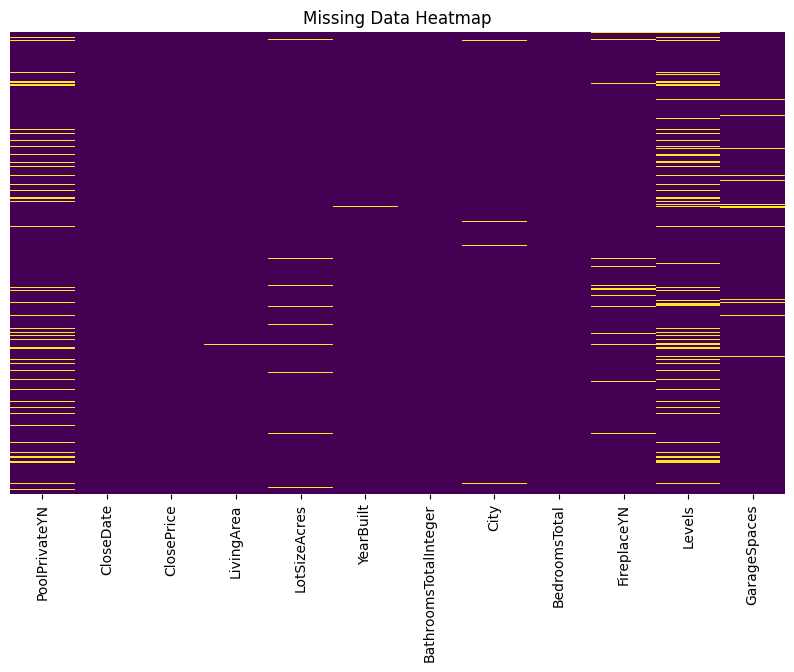

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(crml.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')

plt.yticks([], [])
plt.show()

In [7]:
#21.11% of rows dropped
crml_cleaned = crml.dropna()
print("original: ", crml.shape, "\ncleaned: ", crml_cleaned.shape)

original:  (308619, 12) 
cleaned:  (243506, 12)


In [8]:
#Converting type to datetime
crml_cleaned['CloseDate'] = pd.to_datetime(crml_cleaned['CloseDate'], format='%Y-%m-%d', errors='coerce')

/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/589502429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['CloseDate'] = pd.to_datetime(crml_cleaned['CloseDate'], format='%Y-%m-%d', errors='coerce')


In [9]:
#Converting type to datetime
crml_cleaned['YearBuilt'] = crml_cleaned['YearBuilt'].astype(int)
crml_cleaned['YearBuilt'] = pd.to_datetime(crml_cleaned['YearBuilt'], format='%Y', errors='coerce')

/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/2023215788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['YearBuilt'] = crml_cleaned['YearBuilt'].astype(int)
/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/2023215788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['YearBuilt'] = pd.to_datetime(crml_cleaned['YearBuilt'], format='%Y', errors='coerce')


In [10]:
crml_cleaned['BuildingAge'] = crml_cleaned['CloseDate'].dt.year - crml_cleaned['YearBuilt'].dt.year
crml_cleaned.drop(columns = 'YearBuilt', inplace = True)

/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/3610219892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['BuildingAge'] = crml_cleaned['CloseDate'].dt.year - crml_cleaned['YearBuilt'].dt.year
/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/3610219892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned.drop(columns = 'YearBuilt', inplace = True)


count    2.435060e+05
mean     1.015594e+06
std      9.620513e+05
min      6.590000e+02
25%      5.560000e+05
50%      7.800000e+05
75%      1.160000e+06
max      4.350000e+07
Name: ClosePrice, dtype: float64


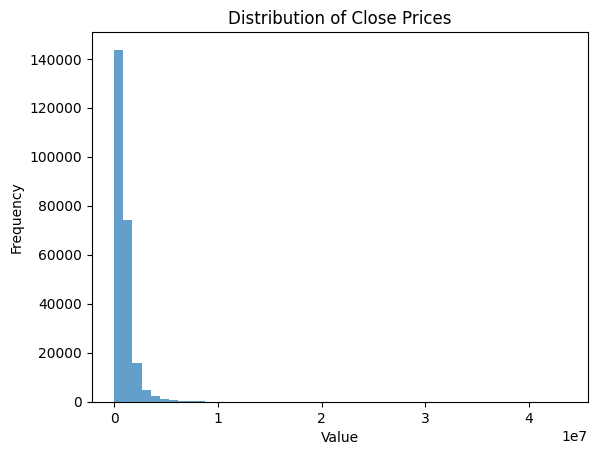

In [11]:
#Very skewed left with outliers to the right
print(crml_cleaned['ClosePrice'].describe())

plt.hist(crml_cleaned['ClosePrice'], bins=50, alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [12]:
crml_cleaned['ClosePrice_Log'] = np.log1p(crml_cleaned['ClosePrice'])

/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/3206828551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['ClosePrice_Log'] = np.log1p(crml_cleaned['ClosePrice'])


count    243506.000000
mean         13.618550
std           0.606927
min           6.492240
25%          13.228525
50%          13.567050
75%          13.963931
max          17.588272
Name: ClosePrice_Log, dtype: float64


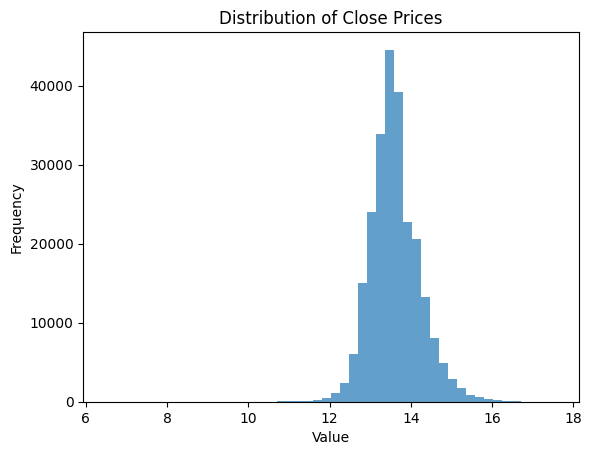

In [13]:
print(crml_cleaned['ClosePrice_Log'].describe())

plt.hist(crml_cleaned['ClosePrice_Log'], bins=50, alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [16]:
crml_cleaned['PoolPrivateYN'] = crml_cleaned['PoolPrivateYN'].astype(int)
crml_cleaned['FireplaceYN'] = crml_cleaned['FireplaceYN'].astype(int)
crml_cleaned['LivingArea'] = crml_cleaned['LivingArea'].astype(int)
crml_cleaned['BathroomsTotalInteger'] = crml_cleaned['BathroomsTotalInteger'].astype(int)
crml_cleaned['BedroomsTotal'] = crml_cleaned['BedroomsTotal'].astype(int)
crml_cleaned['GarageSpaces'] = crml_cleaned['GarageSpaces'].astype(int)

/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/49012743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['PoolPrivateYN'] = crml_cleaned['PoolPrivateYN'].astype(int)
/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/49012743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['FireplaceYN'] = crml_cleaned['FireplaceYN'].astype(int)
/var/folders/zs/qvng4tz16j33kll86qkr6fc40000gn/T/ipykernel_54275/49012743.py:3: SettingWithCopyWarning: 
A value is 

In [17]:
#Display the data types of all columns
print(crml_cleaned.dtypes)

PoolPrivateYN                     int64
CloseDate                datetime64[ns]
ClosePrice                      float64
LivingArea                        int64
LotSizeAcres                    float64
BathroomsTotalInteger             int64
City                             object
BedroomsTotal                     int64
FireplaceYN                       int64
Levels                           object
GarageSpaces                      int64
BuildingAge                       int32
ClosePrice_Log                  float64
dtype: object


In [18]:
#One-hot encoding the 'Levels' column
crml_cleaned = pd.get_dummies(crml_cleaned, columns=['Levels'])

level_columns = ['Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two']
crml_cleaned[level_columns] = crml_cleaned[level_columns].astype(int)

In [19]:
crml_cleaned.head()

,PoolPrivateYN,CloseDate,ClosePrice,LivingArea,LotSizeAcres,BathroomsTotalInteger,City,BedroomsTotal,FireplaceYN,GarageSpaces,BuildingAge,ClosePrice_Log,Levels_MultiSplit,Levels_One,Levels_ThreeOrMore,Levels_Two
3,0,2022-01-04,2499999.0,2645,0.3071,4,Carlsbad,4,0,2,6,14.731801,0,0,1,0
6,0,2022-01-10,640000.0,2070,0.0780,3,Lake Arrowhead,3,1,1,15,13.369225,0,0,1,0
7,0,2022-03-23,438000.0,1174,0.2273,2,Fontana,3,0,2,62,12.989976,0,1,0,0
14,0,2022-01-19,399990.0,1422,0.2800,2,Paradise,3,0,2,1,12.899197,0,1,0,0
21,0,2022-01-03,1839270.0,3773,0.1738,4,Rancho Penasquitos,6,1,3,20,14.424880,0,0,0,1


In [20]:
#Log transforming then min-max scaling
from sklearn.preprocessing import MinMaxScaler

crml_cleaned['LivingArea_Log'] = np.log1p(crml_cleaned['LivingArea'])

scaler = MinMaxScaler()
crml_cleaned['LivingArea_Log_Scaled'] = scaler.fit_transform(crml_cleaned[['LivingArea_Log']])

print(crml_cleaned[['LivingArea', 'LivingArea_Log', 'LivingArea_Log_Scaled']])

        LivingArea  LivingArea_Log  LivingArea_Log_Scaled
3             2645        7.880804               0.579748
6             2070        7.635787               0.561724
7             1174        7.069023               0.520030
14            1422        7.260523               0.534118
21            3773        8.235891               0.605870
...            ...             ...                    ...
585823        3588        8.185629               0.602173
585824         900        6.803505               0.500497
585825         975        6.883463               0.506379
585827        3281        8.096208               0.595594
585830        1207        7.096721               0.522068

[243506 rows x 3 columns]


In [21]:
crml_cleaned['LotSizeAcres_Log'] = np.log1p(crml_cleaned['LotSizeAcres'])

scaler = MinMaxScaler()
crml_cleaned['LotSizeAcres_Log_Scaled'] = scaler.fit_transform(crml_cleaned[['LotSizeAcres_Log']])

print(crml_cleaned[['LotSizeAcres', 'LotSizeAcres_Log', 'LotSizeAcres_Log_Scaled']])

        LotSizeAcres  LotSizeAcres_Log  LotSizeAcres_Log_Scaled
3             0.3071          0.267811                 0.019284
6             0.0780          0.075107                 0.005408
7             0.2273          0.204817                 0.014748
14            0.2800          0.246860                 0.017775
21            0.1738          0.160246                 0.011539
...              ...               ...                      ...
585823        0.1700          0.157004                 0.011305
585824        5.0000          1.791759                 0.129018
585825        0.2400          0.215111                 0.015489
585827        0.4600          0.378436                 0.027250
585830        5.4500          1.864080                 0.134226

[243506 rows x 3 columns]


In [22]:
#Removing errors
crml_cleaned['BathroomsTotalInteger'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['BathroomsTotalInteger'] <= 20]

In [23]:
#Applying standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

crml_cleaned['Bathrooms_Scaled'] = scaler.fit_transform(crml_cleaned[['BathroomsTotalInteger']])

print(crml_cleaned[['BathroomsTotalInteger', 'Bathrooms_Scaled']])

        BathroomsTotalInteger  Bathrooms_Scaled
3                           4          1.381623
6                           3          0.425712
7                           2         -0.530199
14                          2         -0.530199
21                          4          1.381623
...                       ...               ...
585823                      3          0.425712
585824                      2         -0.530199
585825                      1         -1.486110
585827                      3          0.425712
585830                      2         -0.530199

[243500 rows x 2 columns]


In [24]:
crml_cleaned['BedroomsTotal'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['BedroomsTotal'] <= 15]

In [25]:
scaler = StandardScaler()

crml_cleaned['Bedrooms_Scaled'] = scaler.fit_transform(crml_cleaned[['BedroomsTotal']])

print(crml_cleaned[['BedroomsTotal', 'Bedrooms_Scaled']])

        BedroomsTotal  Bedrooms_Scaled
3                   4         0.575701
6                   3        -0.493060
7                   3        -0.493060
14                  3        -0.493060
21                  6         2.713224
...               ...              ...
585823              5         1.644463
585824              2        -1.561822
585825              2        -1.561822
585827              5         1.644463
585830              3        -0.493060

[243496 rows x 2 columns]


In [26]:
crml_cleaned['GarageSpaces'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['GarageSpaces'] <= 20]

In [27]:
scaler = StandardScaler()

crml_cleaned['GarageSpaces_Scaled'] = scaler.fit_transform(crml_cleaned[['GarageSpaces']])

print(crml_cleaned[['GarageSpaces', 'GarageSpaces_Scaled']])

        GarageSpaces  GarageSpaces_Scaled
3                  2             0.007120
6                  1            -1.095572
7                  2             0.007120
14                 2             0.007120
21                 3             1.109813
...              ...                  ...
585823             2             0.007120
585824             5             3.315197
585825             2             0.007120
585827             4             2.212505
585830             1            -1.095572

[243451 rows x 2 columns]


In [28]:
crml_cleaned['BuildingAge'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['BuildingAge'] >= 0]

In [29]:
scaler = StandardScaler()

crml_cleaned['BuildingAge_Scaled'] = scaler.fit_transform(crml_cleaned[['BuildingAge']])

print(crml_cleaned[['BuildingAge', 'BuildingAge_Scaled']])

        BuildingAge  BuildingAge_Scaled
3                 6           -1.501166
6                15           -1.161092
7                62            0.614851
14                1           -1.690096
21               20           -0.972162
...             ...                 ...
585823           19           -1.009948
585824           65            0.728209
585825           58            0.463707
585827           19           -1.009948
585830           82            1.370572

[243433 rows x 2 columns]


In [30]:
#Finally, min-max scale close price
scaler = MinMaxScaler()
crml_cleaned['ClosePrice_Log_Scaled'] = scaler.fit_transform(crml_cleaned[['ClosePrice_Log']])

print(crml_cleaned[['ClosePrice', 'ClosePrice_Log', 'ClosePrice_Log_Scaled']])

        ClosePrice  ClosePrice_Log  ClosePrice_Log_Scaled
3        2499999.0       14.731801               0.742568
6         640000.0       13.369225               0.619770
7         438000.0       12.989976               0.585591
14        399990.0       12.899197               0.577410
21       1839270.0       14.424880               0.714908
...            ...             ...                    ...
585823    925000.0       13.737550               0.652964
585824    525000.0       13.171155               0.601919
585825    313000.0       12.653962               0.555309
585827    835000.0       13.635188               0.643739
585830    590000.0       13.287880               0.612439

[243433 rows x 3 columns]


In [31]:
crml_cleaned.columns

Index(['PoolPrivateYN', 'CloseDate', 'ClosePrice', 'LivingArea',
       'LotSizeAcres', 'BathroomsTotalInteger', 'City', 'BedroomsTotal',
       'FireplaceYN', 'GarageSpaces', 'BuildingAge', 'ClosePrice_Log',
       'Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two',
       'LivingArea_Log', 'LivingArea_Log_Scaled', 'LotSizeAcres_Log',
       'LotSizeAcres_Log_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled',
       'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'ClosePrice_Log_Scaled'],
      dtype='object')

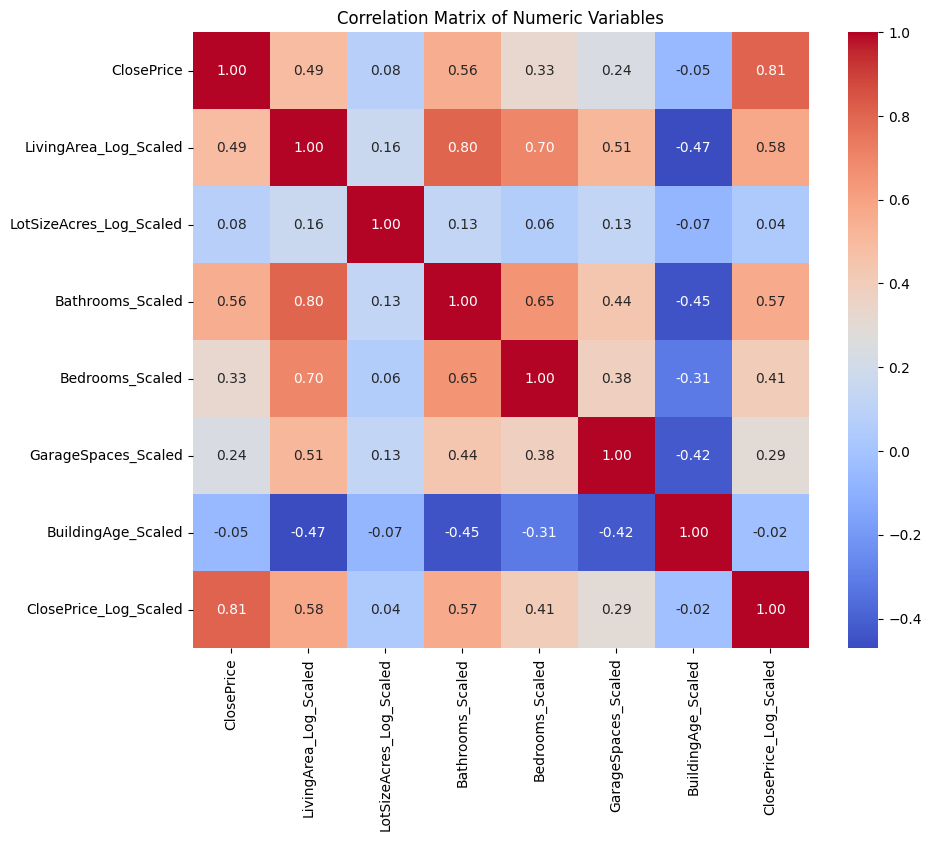

In [33]:
numeric_columns = [
    'ClosePrice', 'LivingArea_Log_Scaled', 'LotSizeAcres_Log_Scaled',
    'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'ClosePrice_Log_Scaled'
]

correlation_matrix = crml_cleaned[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [34]:
#Sort by close date before creating sequences
crml_cleaned = crml_cleaned.sort_values('CloseDate')

In [35]:
#City as embedding layer
crml_cleaned['City_Code'] = crml_cleaned['City'].astype('category').cat.codes

In [37]:
features = [
    'PoolPrivateYN', 'FireplaceYN', 'City_Code',  #Binary and embedded
    'Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two',  #One-hot encoded
    'LivingArea_Log_Scaled', 'LotSizeAcres_Log_Scaled',  #Log-scaled numerical
    'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 'BuildingAge_Scaled'  #Standard-scaled numerical
]

target = 'ClosePrice_Log_Scaled'

In [48]:
#Function for creating sequences
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

#Extract features and target as numpy arrays
data = crml_cleaned[features].values
target_data = crml_cleaned[target].values

sequence_length = 30

X, y = create_sequences(data, target_data, sequence_length)



city_input_data = X[:, :, 2]
numerical_input_data = np.delete(X, 2, axis=2)

print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Shape of X: (243403, 30, 13), Shape of y: (243403,)


In [49]:
#Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate

# Input for the categorical City feature (embedding)
city_input = Input(shape=(sequence_length,), name='City_Input')
city_embedding = Embedding(input_dim=1055, output_dim=32)(city_input)

# Input for numerical and binary features
num_input = Input(shape=(sequence_length, len(features) - 1), name='Numerical_Input')

# Combine all features
x = Concatenate(axis=-1)([city_embedding, num_input])

# Add LSTM layers
x = LSTM(64, return_sequences=True)(x)
x = LSTM(32)(x)

# Output layer for regression
output = Dense(1, activation='linear', name='Output')(x)

# Build and compile the model
model = Model(inputs=[city_input, num_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ City_Input          │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 30, 32)    │     33,760 │ City_Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Numerical_Input     │ (None, 30, 12)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 30, 44)    │          0 │ embedding_2[0][0… │
│ (Concatenate)       │                   │            │ Numerical_Input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 30, 64)    │     27,904 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     12,416 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │         33 │ lstm_5[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,113 (289.50 KB)

 Trainable params: 74,113 (289.50 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model
history = model.fit(
    [city_input_data, numerical_input_data],
    y,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - loss: 0.0050 - mae: 0.0471 - val_loss: 0.0032 - val_mae: 0.0424
Epoch 2/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - loss: 0.0030 - mae: 0.0419 - val_loss: 0.0031 - val_mae: 0.0420
Epoch 3/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - loss: 0.0030 - mae: 0.0416 - val_loss: 0.0031 - val_mae: 0.0426
Epoch 4/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - loss: 0.0030 - mae: 0.0415 - val_loss: 0.0032 - val_mae: 0.0424
Epoch 5/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - loss: 0.0030 - mae: 0.0415 - val_loss: 0.0031 - val_mae: 0.0420
Epoch 6/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - loss: 0.0030 - mae: 0.0415 - val_loss: 0.0031 - val_mae: 0.0423
Epoch 7/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - loss: 0.0030 - mae: 0.0413 - val_loss: 0.0031 - val_mae: 0.0424
Epoch 8/50
6086/6086 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - loss: 0.0029 - mae: 0.0412 - val_loss: 0.0031 - val_mae: 0.0423
Epoch 9/50
6086/6086 ━━━━━━━━━━━

In [53]:
# Evaluate the model
loss, mae = model.evaluate([city_input_test, numerical_input_test], y_test, verbose=1)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict on test data
y_pred = model.predict([city_input_test, numerical_input_test])

# Reshape predictions and actual values if necessary
y_pred = y_pred.flatten()  # Ensure predictions have the correct shape
y_test = y_test.flatten()  # Ensure true values have the correct shape

# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Sample Index')
plt.ylabel('Scaled ClosePrice')
plt.show()

NameError: name 'city_input_test' is not defined